In [197]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [198]:
import plotly.express as px
img_f = cv2.imread('homotest.jpg',0) 
img_f = cv2.adaptiveThreshold(img_f,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25,2)
kernel = np.ones((3, 3), np.uint8)
img_f = cv2.dilate(img_f, kernel, iterations=2)
img_f = cv2.erode(img_f, kernel, iterations=1)


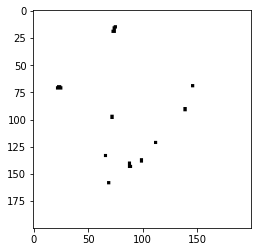

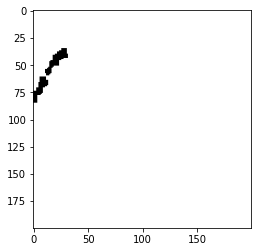

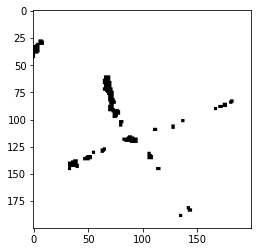

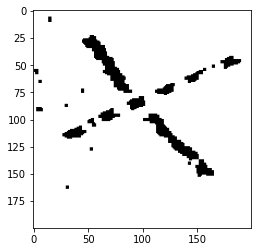

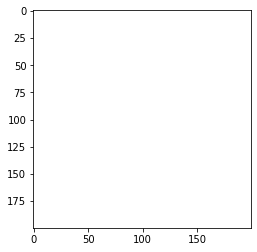

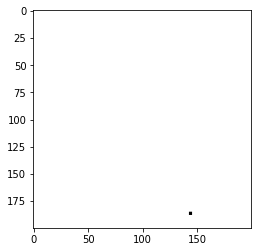

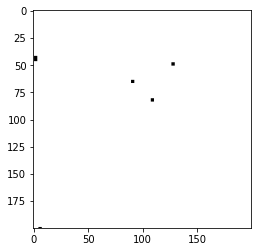

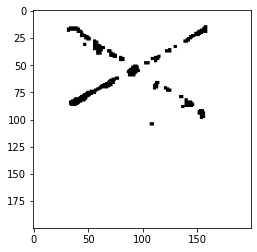

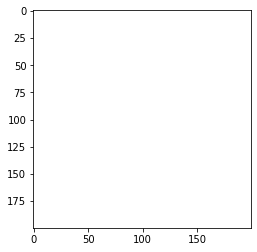

In [200]:
# subs_list=get_subs(coor_list)
subs_list=[]
for i in range(3):
    for j in range(3):
        cur = img_f[i*300:(i+1)*300, j*300:(j+1)*300]
        cur = cur[50:250, 50:250]
        subs_list.append(cur)
        plt.imshow(cur, cmap='gray', vmin=0, vmax=255)
        plt.show()

33


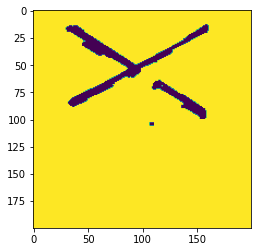

In [201]:
img = subs_list[7]
lines_list =[]
lines = cv2.HoughLinesP((255-img), 1, np.pi/180, threshold=10, minLineLength=5, maxLineGap=10)

for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,255),2)
    lines_list.append([(x1,y1),(x2,y2)])

plt.imshow(img)
print(len(lines_list))

In [202]:
def Hough(img):
    lines_list =[]
    lines = cv2.HoughLinesP((255-img), 1, np.pi/180, threshold=10, minLineLength=5, maxLineGap=10)
    if lines is None:
        return 0
    for points in lines:
        x1,y1,x2,y2=points[0]
        lines_list.append([(x1,y1),(x2,y2)])
    return len(lines_list)
    

In [208]:
result=[]
for sub in subs_list:
    result.append(Hough(sub))

print(result)

[4, 12, 39, 78, 0, 0, 0, 43, 0]
